# <font color ="yellow"> **Capstone Project : Bank Marketing Campaign** </font>

## **Libraries**

In [73]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import normaltest

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics untuk klasifikasi
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

<hr>

## **Business Understanding**
### **Konteks**
Banyak jenis produk finansial yang ditawarkan oleh perbankan. salah satu produk finansial yang cukup populer adalah deposito berjangka. Mekanisme deposito berjangka adalah jumlah uang yang didepositokan oleh nasabah dapat diambil kembali setelah satu periode waktu berlalu. Sebagai kompensasi, nasabah diberikan bunga tetap sesuai dengan nominal uang yang didepositokan. Sebagai entitas bisnis dengan produk finansial, perbankan masih harus berkompetisi untuk tidak kehilangan nasabahnya. salah satu caranya adalah dengan melakukan kampanye pemasaran (marketing campaign)
Target :
- 0 : Nasabah yang tidak membuka rekening tabungan deposito berjangka.
- 1 : Nasabah yang membuka rekening tabungan deposito berjangka.

#### **Definisi Deposito Berjangka**
Deposito adalah simpanan yang pencairannya hanya dapat dilakukan pada jangka waktu tertentu dan syarat-syarat tertentu. Karakteristik deposito dari antara lain adalah deposito dapat dicairkan setelah jangka waktu berakhir, deposito yang akan jatuh tempo dapat diperpanjang secara otomatis atau automatic roll over (ARO), deposito dapat dalam mata uang rupiah maupun dalam mata uang asing.
Deposito Berjangka Merupakan simpanan yang pencairannya dilakukan berdasarkan jangka waktu tertentu. Umumnya mempunyai jangka waktu mulai dari 1, 3, 6, dan 12 sampai dengan 24 bulan. Diterbitkan dengan mencantumkan nama pemilik deposito baik perorangan maupun lembaga. [https://sikapiuangmu.ojk.go.id/FrontEnd/CMS/Category/121]

#### **Problem Statement**
Sebagai badan usaha, perbankan harus tetap berkompetisi untuk tidak kehilangan nasabahnya. salah satu cara untuk mendapatkan nasabah baru adalah dengan melakukan marketing campaign. Hal yang menjadi permasalahan utama adalah bagaimana perbankan mengetetahui nasabah mana yang akan membuka rekening deposito atau tidak. Untuk meminimalisir biaya marketing campaign, perusahaan harus mengenal karakteristik nasabah mana yang sekiranya akan membuka rekening deposito sehingga kampanye yang dilakukan menjadi tepat sasaran. Berdasarkan dataset yang dimiliki, apakah proses marketing campaign ini memerlukan peran machine learning atau tidak untuk menentukan nasabah yang akan diberikan marketing campaign. maka problem statement ini dapat disimpulkan kedalam beberapa pertanyaan :

- Siapa saja nasabah yang berpotensial untuk melakukan pembukaan rekening tabungan deposito berjangka?
- Lebih baik melakukan marketing campaign ke seluruh nasabah atau hanya kepada nasabah yang menurut machine learning berpotensial untuk membuka tabungan deposito berjangka? 

#### **Goals**
Tujuan yang ingin dicapai adalah menjawab problem statement diatas yakni :
- Mengetahui nasabah mana saja yang berpotensial untuk melakukan pembukaan rekening tabungan deposito berjangka.
- Mengetahui apakah harus melakukan marketing campaign ke seluruh nasabah atau kepada nasabah yang berpotensial saja.


#### **Analytic Approach**
Berikut ini merupakan tahapan pendekatan analisa ang akan dilakukan :
1. business understanding, memahami proses bisnis yang terjadi.
2. berdasarkan permasalahan yang terjadi, dibutuhkan peran machine learning dalam memprediksi nasabah yang akan membuka rekening deposito atau tidak.
3. Menentukan apakah marketing campaign yang akan dilakukan perlu dilakukan kepada seluruh nasabah atau hanya nasabah yang diprediksi oleh machine learning untuk membuka rekening atau tidak.

#### **Evaluation Metric**
Matrik evaluasi yang akan digunakan adalah `f1 score` karena baik marketing campaign fee dan opportunity cost dianggap sama pentingnya maka `f1 score` digunakan.

- False Positive : Nasabah yang diprediksi akan deposito namun ternyata tidak. False positive menyebabkan kita mengeluarkan biaya marketing campaign padahal nasabah tersebut tidak akan membuka tabungan rekening deposito.
- False Negative : Nasabah yang diprediksi tidak akan deposito namun ternyata melakukan deposito. False negative menyebabkan bank mengealami opportunity cost atau profit loss. 

<hr>

## **Load Dataset**

In [74]:
df = pd.read_csv("data_bank_marketing_campaign.csv")
df.sample(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
554,29,services,196,no,no,cellular,jan,2,-1,unknown,yes
5007,28,unknown,4465,no,no,cellular,jan,1,-1,unknown,yes
7185,77,management,1780,yes,no,cellular,oct,2,183,success,yes
4930,58,services,943,yes,no,unknown,jun,3,-1,unknown,no
3200,57,housemaid,260,yes,no,unknown,may,3,-1,unknown,no
5234,52,housemaid,3798,yes,no,cellular,jul,1,-1,unknown,yes
5676,45,blue-collar,521,yes,no,unknown,jun,3,-1,unknown,no
3962,45,technician,-25,no,yes,unknown,jul,3,-1,unknown,no
7270,39,services,702,yes,no,cellular,apr,1,300,failure,no
4859,32,management,282,no,no,cellular,aug,2,-1,unknown,no


<table>
<h2><b> Data Dictionary or Feature Description </b></h2>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>Usia Nasabah.</td>
    <td>Customer Profile</td>
  </tr>
    <tr>
    <td>Job</td>
    <td>Jenis Pekerjaan Nasabah.</td>
    <td>Customer Profile</td>
  </tr>
    <tr>
    <td>Balance</td>
    <td>Saldo yang dimiliki oleh nasabah.</td>
    <td>Customer Profile</td>
  </tr>
    <tr>
    <td>Housing</td>
    <td>Status nasabah perihal cicilan KPR.</td>
    <td>Customer Profile</td>
  </tr>
    <tr>
    <td>Loan</td>
    <td>Status nasabah perihal meminjamkan uang.</td>
    <td>Customer Profile</td>
  </tr>
    <tr>
    <td>Contact</td>
    <td>Jenis komunikasi yang dilakukan dengan nasabah.</td>
    <td>Marketing Data</td>
  </tr>
    <tr>
    <td>Month</td>
    <td>Bulan terakhir dikontak oleh bank.</td>
    <td>Marketing Data</td>
  </tr>
  <tr>
    <td>Campaign</td>
    <td>Jumlah kontak yang dilakukan bank kepada nasabah.</td>
    <td>Marketing Data</td>
  </tr>
  <tr>
    <td>Pdays</td>
    <td>Jumlah hari setelah nasabah diberikan marketing campaign.</td>
    <td>Marketing Data</td>
  </tr>
  <tr>
    <td>Poutcome</td>
    <td>Hasil dari marketing campaign terakhir yang dilakukan.</td>
    <td>Marketing Data</td>
  </tr>
  <tr>
    <td>Deposit</td>
    <td>Status apakah nasabah melakukan deposito atau tidak.</td>
    <td>Marketing Data</td>
  </tr>
</table>

<hr>

## **Data Understanding**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Interpretasi :
- Terdapat 11 kolom yang terdiri dari 4 kolom numerik dan 7 kolom string atau objek.
- Tidak terdapat kolom yang tidak memiliki nilai (missing values).
- Terdapat 7813 jumlah baris data.

## **Descriptive Statistics**

**numerical column**

In [76]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [77]:
95 - 18

77

Interpretasi :
- age 
    - usia minimum 18 tahun
    - usia maksimum 95 tahun
    - rentang usia 
    - berarti nasabah memiliki persyaratan usia minimum untuk membuka rekening pada usia 18 tahun.


**categorical column**

In [78]:
df.describe(include='O')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [127]:
df['job'].value_counts()

job
management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

In [128]:
df['contact'].value_counts()

contact
cellular     5623
unknown      1636
telephone     546
Name: count, dtype: int64

**Missing Values**

In [79]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

#### **Insights**
- Tidak terdapat missing value pada seluruh kolom

**Duplicated Values**

In [80]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [81]:
df.duplicated().sum()

8

In [82]:
df = df.drop_duplicates()

In [83]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


- Terdapat 8 baris data yang duplikat

**Unique Values**

In [126]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().head(5).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(7805, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,age,int64,0,75,"[55, 39, 51, 38, 36]"
1,job,object,0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,3153,"[1662, -3058, 3025, -87, 205]"
3,housing,object,0,2,"[no, yes]"
4,loan,object,0,2,"[no, yes]"
5,contact,object,0,3,"[cellular, telephone, unknown]"
6,month,object,0,12,"[jun, apr, may, nov, jan]"
7,campaign,int64,0,32,"[2, 3, 1, 4, 5]"
8,pdays,int64,0,422,"[-1, 352, 21, 91, 186]"
9,deposit,int32,0,2,"[1, 0]"


In [85]:
#terdapat 11 jenis pekerjaan ditambah dengan unknown. 
df['job'].value_counts()

job
management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64

<hr>

## **Exploratory Data Analysis (EDA)**

In [86]:
categorical_list = ['job', 'housing', 'loan', 'contact','month', 'campaign', 'poutcome', 'deposit']
numerical_list = ['age', 'balance','campaign','pdays']

### **Numerical Features Data Disribution**

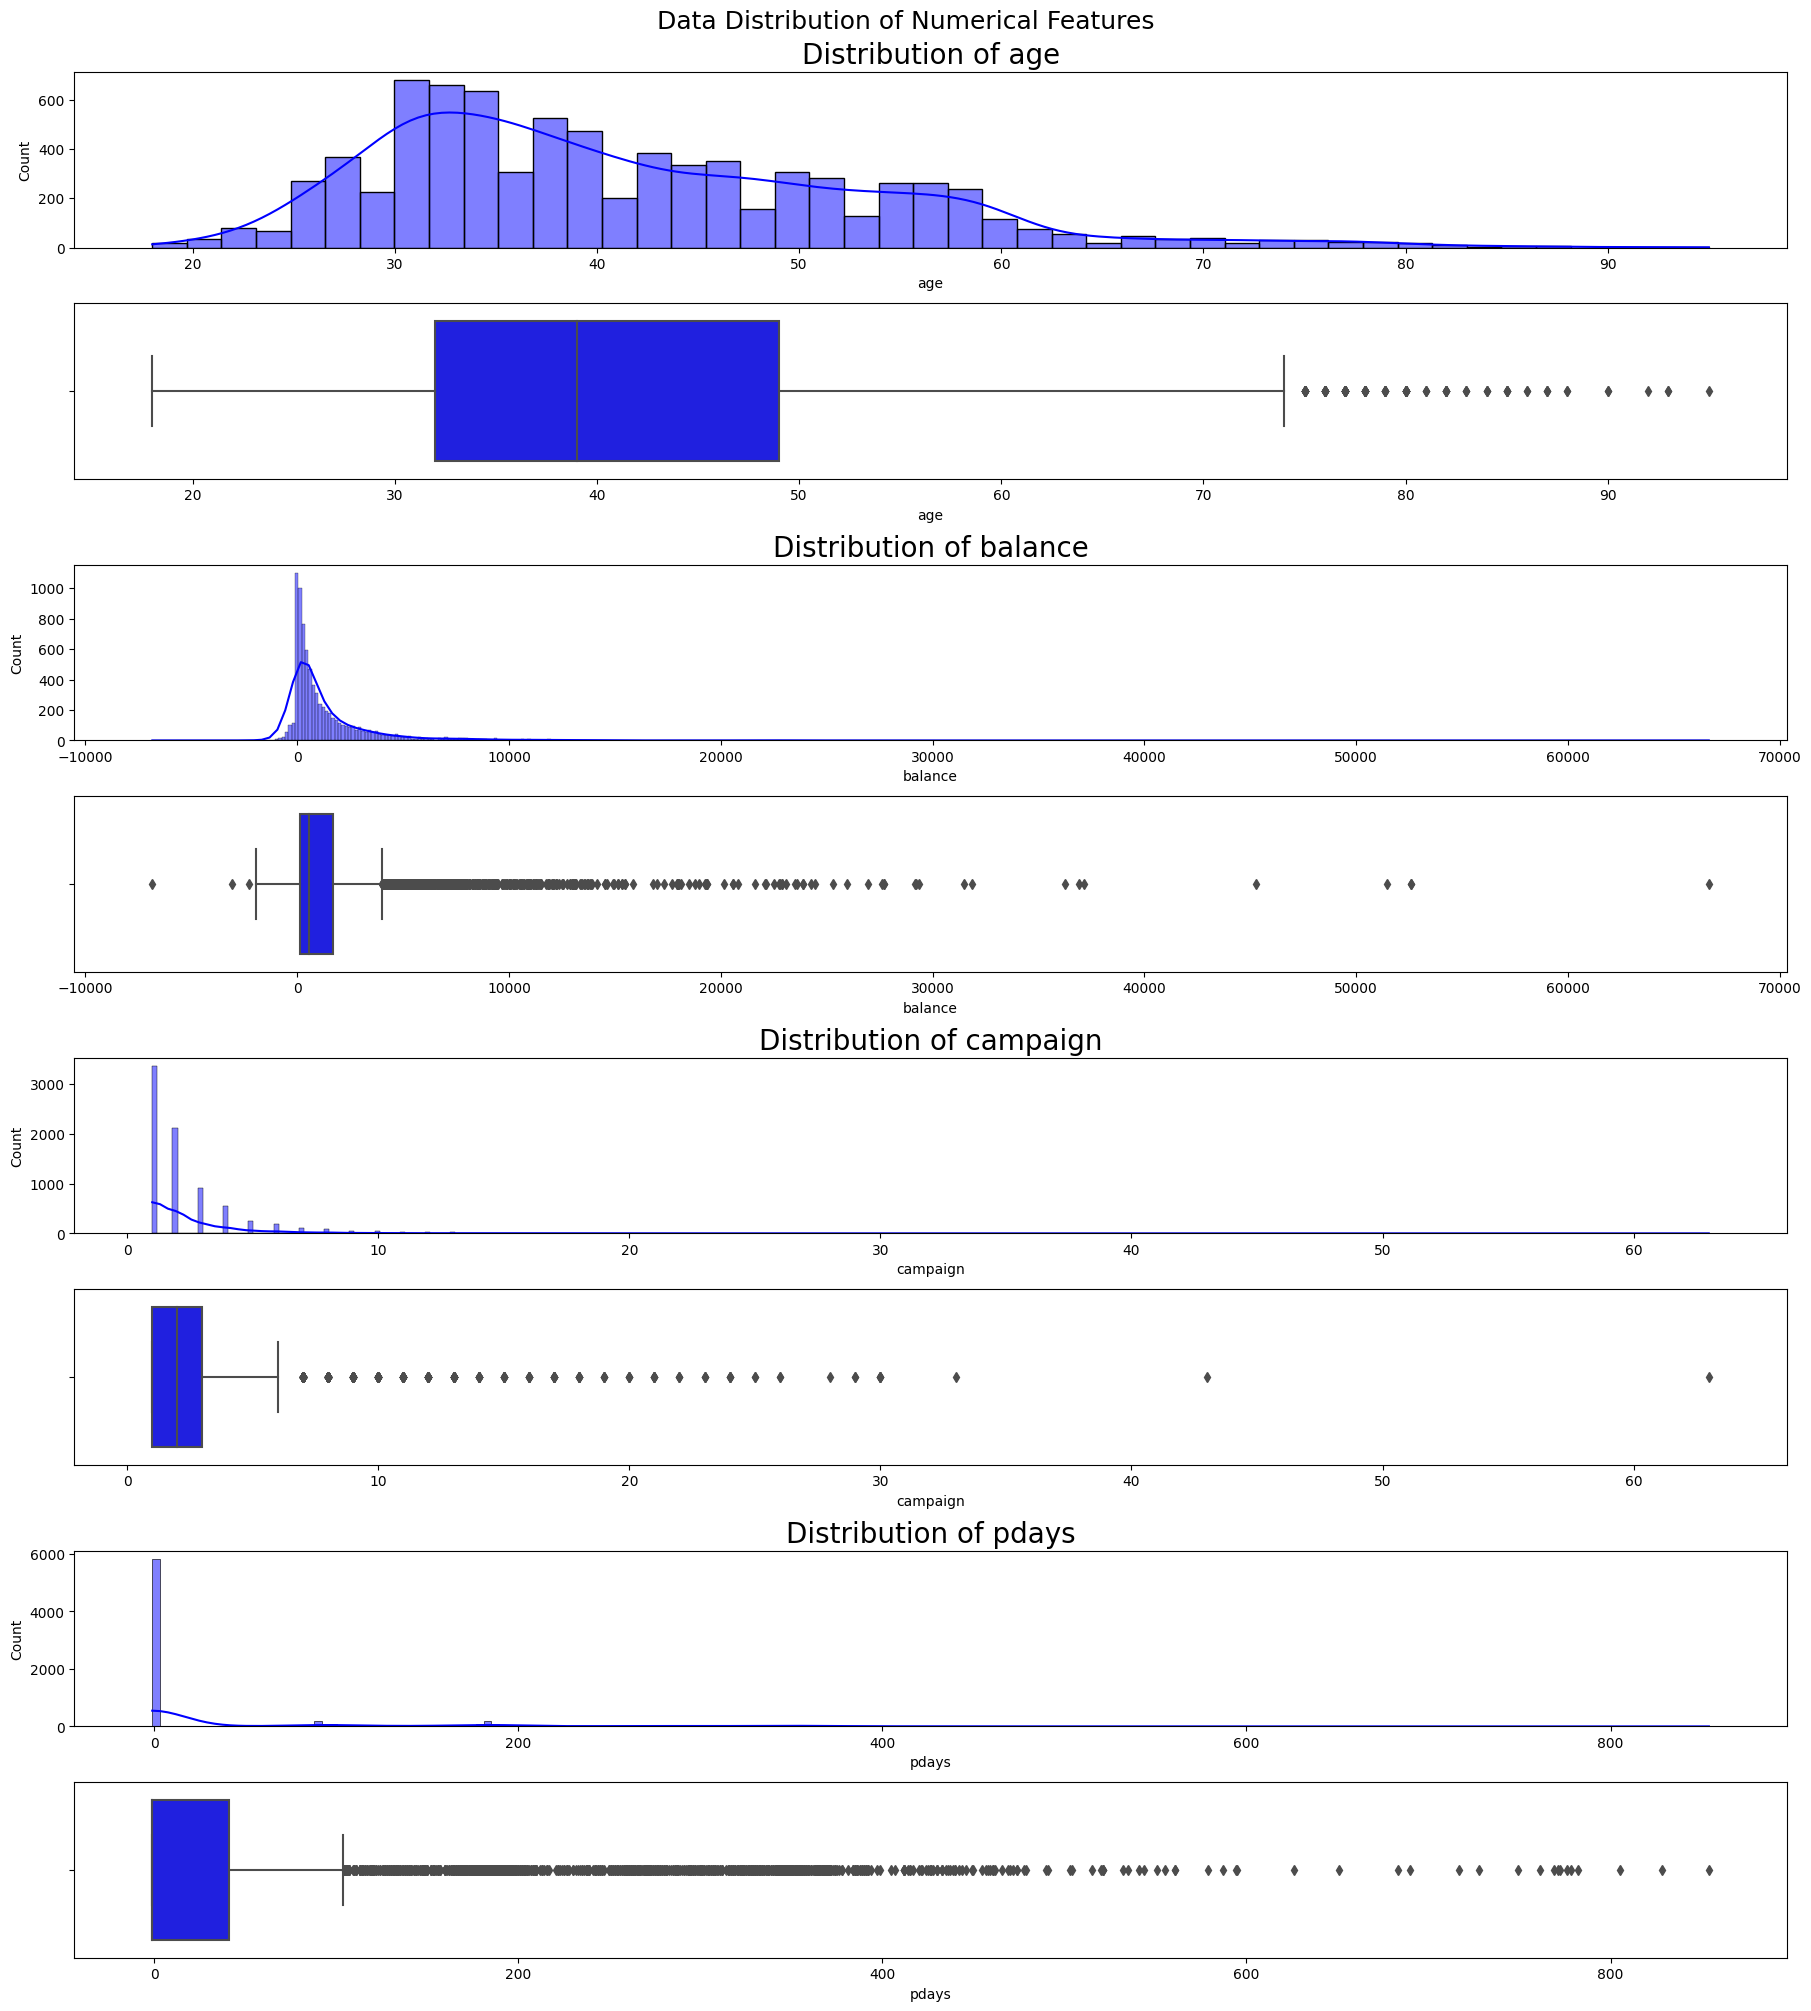

In [87]:
fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize=(18,20),
                         gridspec_kw={"hspace": 0.05},constrained_layout = True)
plt.suptitle("Data Distribution of Numerical Features", size = 18)
counter1 = 0
for col in numerical_list:  
    axes[counter1].set_title(f"Distribution of {col}", color = "black")
    axes[counter1].title.set_size(20)
    sns.histplot(data = df, x = col, ax=axes[counter1], color='b', kde=True)
    if counter1 != 8:
        counter1 +=1
    sns.boxplot(data = df, x = col, ax=axes[counter1], color='b')
    if counter1 != 8:
        counter1 +=1
plt.show()
  

#### **Outliers Age**

In [88]:
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
upper_fence

74.5

Kolom age memiliki upper fence pada angka 74.5 tahun. berarti nasabah diatas 74.5 tahun dianggap sebagai outliers.

#### **Outliers balance**

In [89]:
Q3 = df['balance'].quantile(0.75)
Q1 = df['balance'].quantile(0.25)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q3 - 1.5 * IQR
print("upper fence :", upper_fence)
print("lower fence :", lower_fence)

upper fence : 4020.5
lower fence : -650.5


kolom age memiliki upper fence 4019.5 dan lower fence -651.5, berarti nasabah dengan saldo di bank yang lebih dari 4019.5 dan lebih kecil dari -651.5 dianggap sebagai outliers.

#### **Outliers Campaign**

In [90]:
Q3 = df['campaign'].quantile(0.75)
Q1 = df['campaign'].quantile(0.25)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q3 - 1.5 * IQR
print("upper fence :", upper_fence)

upper fence : 6.0


kolom campaign memiliki upper fence 6.0, berarti nasabah yang dikontak lebih dari 6x pada campaign yang sedang berlangsung dianggap sebagai outliers.

#### **Outliers pdays**

In [91]:
Q3 = df['pdays'].quantile(0.75)
Q1 = df['pdays'].quantile(0.25)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q3 - 1.5 * IQR
print("upper fence :", upper_fence)

upper fence : 104.0


kolom pdays memiliki upper fence 101.5, berarti nasabah dengan nilai pdays lebih dari 101.5 hari dianggap sebagai outliers.

**Insights** :
- Pada kolom balance dan pdays tidak memiliki pola sehingga kemungkinan perlu dilakukan binning data 
- Pada seluruh kolom numerikal semua data memiliki outlier, sehingga untuk scaling, robust scaler dapat dijadikan sebagai pertimbangan. 

### **Categorical Features Data Distribution**

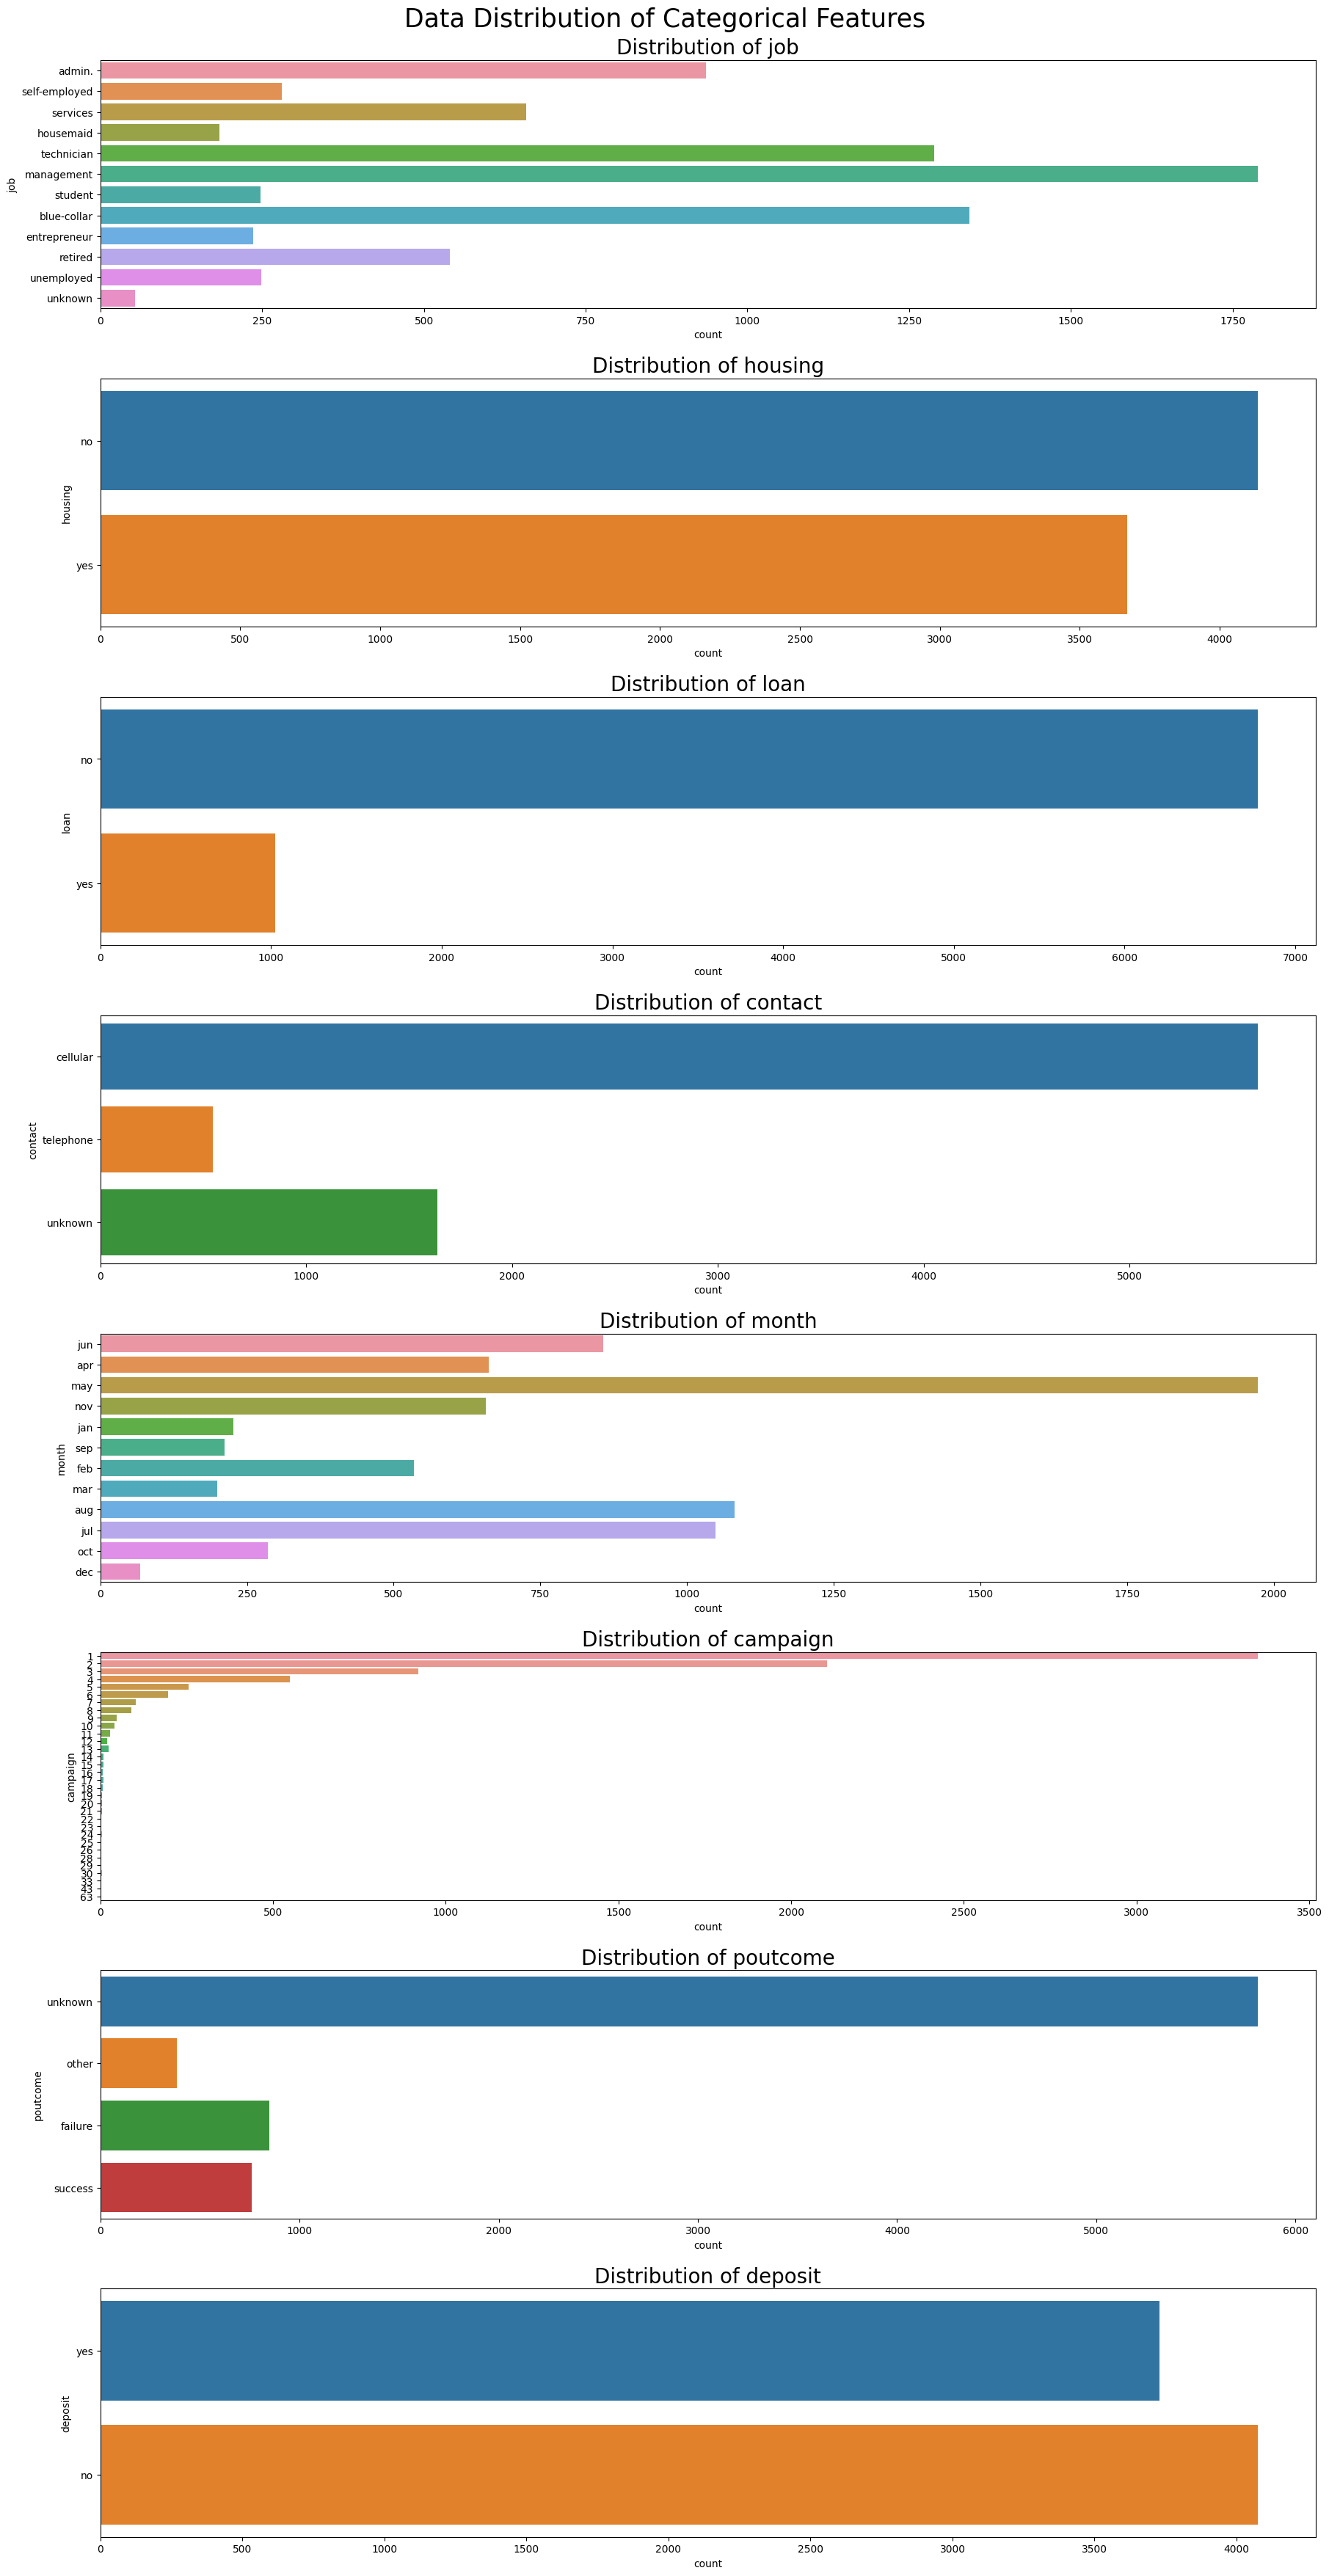

In [92]:
fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize=(18,35),
                         gridspec_kw={"hspace": 0.05},constrained_layout = True)
plt.suptitle("Data Distribution of Categorical Features", size = 25)
counter1 = 0
for col in categorical_list:  
    axes[counter1].set_title(f"Distribution of {col}", color = "black")
    axes[counter1].title.set_size(20)
    sns.countplot(data = df, y = col, ax=axes[counter1])
    if counter1 != 8:
        counter1 +=1
plt.show()
  

**Insights** :
- Pada kolom poutcome, terdapat 74% data yang unknown sehingga dipertimbangkan untuk dilakukan column dropping.
- Pekerjaan(Job) nasabah yang paling banyak adalah management, diikuti oleh blue-collar. dan yang paling sedikit adalah nasabah yang jobnya unknown.
- Lebih banyak nasabah yang tidak memiliki pinjaman (loan) dibandingkan memiliki loan. 
- Jenis komunikasi yang paling banyak dilakukan oleh bank kepada nasabah adalah melalui cellular.
- Bulan terakhir nasabah dikontak oleh bank paling banyak terdapat pada bulan Mei dan yang paling sedikit adalah bulan Dec.
- lebih banyak nasabah yang tidak memiliki cicilan kpr (housing).
- Pada dataset, lebih banyak nasabah yang tidak melakukan deposit dibandingkan dengan yang melakukan deposit. 


#### **Data Correlation**

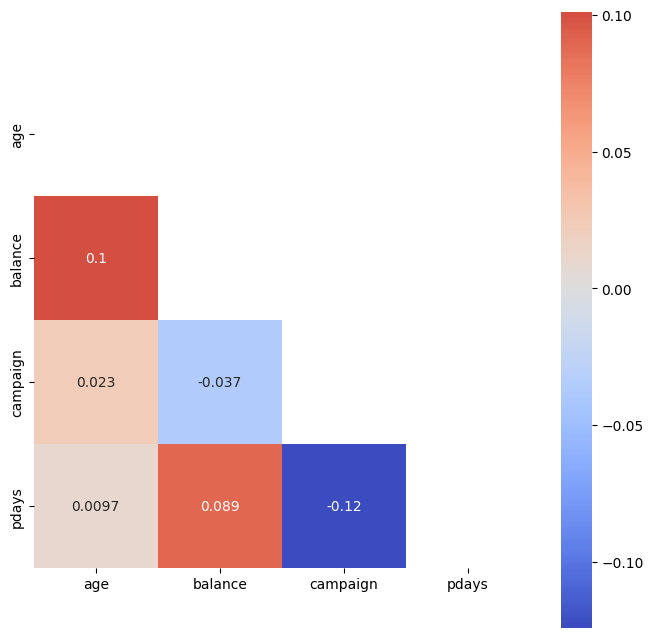

In [93]:
plt.figure(figsize=(8,8))

matrix = np.triu(df.corr(method='spearman', numeric_only=True))

sns.heatmap(data=df.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

method spearman dalam menghitung nilai korelasi digunakan karena nilai terdistribusi secara tidak normal.

In [94]:
df.corr(method='spearman', numeric_only=True)

,age,balance,campaign,pdays
age,1.000000,0.101017,0.023083,0.009730
balance,0.101017,1.000000,-0.037065,0.089467
campaign,0.023083,-0.037065,1.000000,-0.124178
pdays,0.009730,0.089467,-0.124178,1.000000


Insights :
- Antar kolom numerik semuanya berkorelasi secara lemah 
- kolom age dengan pdays berkorelasi lemah sebesar 0.0097
- kolom balance dengan age berkorelasi lemah sebesar 0.1
- kolom balance dengan campaign berkorelasi lemah sebesar -0.037
- kolom campaign dengan age berkorelasi lemah sebesar 0.023
- kolom campaign dengan pdays berkorelasi lemah sebesar -0.12

## **Plot of Categorical Features vs Target**

In [95]:
categorical_features = ['job', 'housing', 'loan', 'contact','month', 'poutcome']
target = ['deposit']

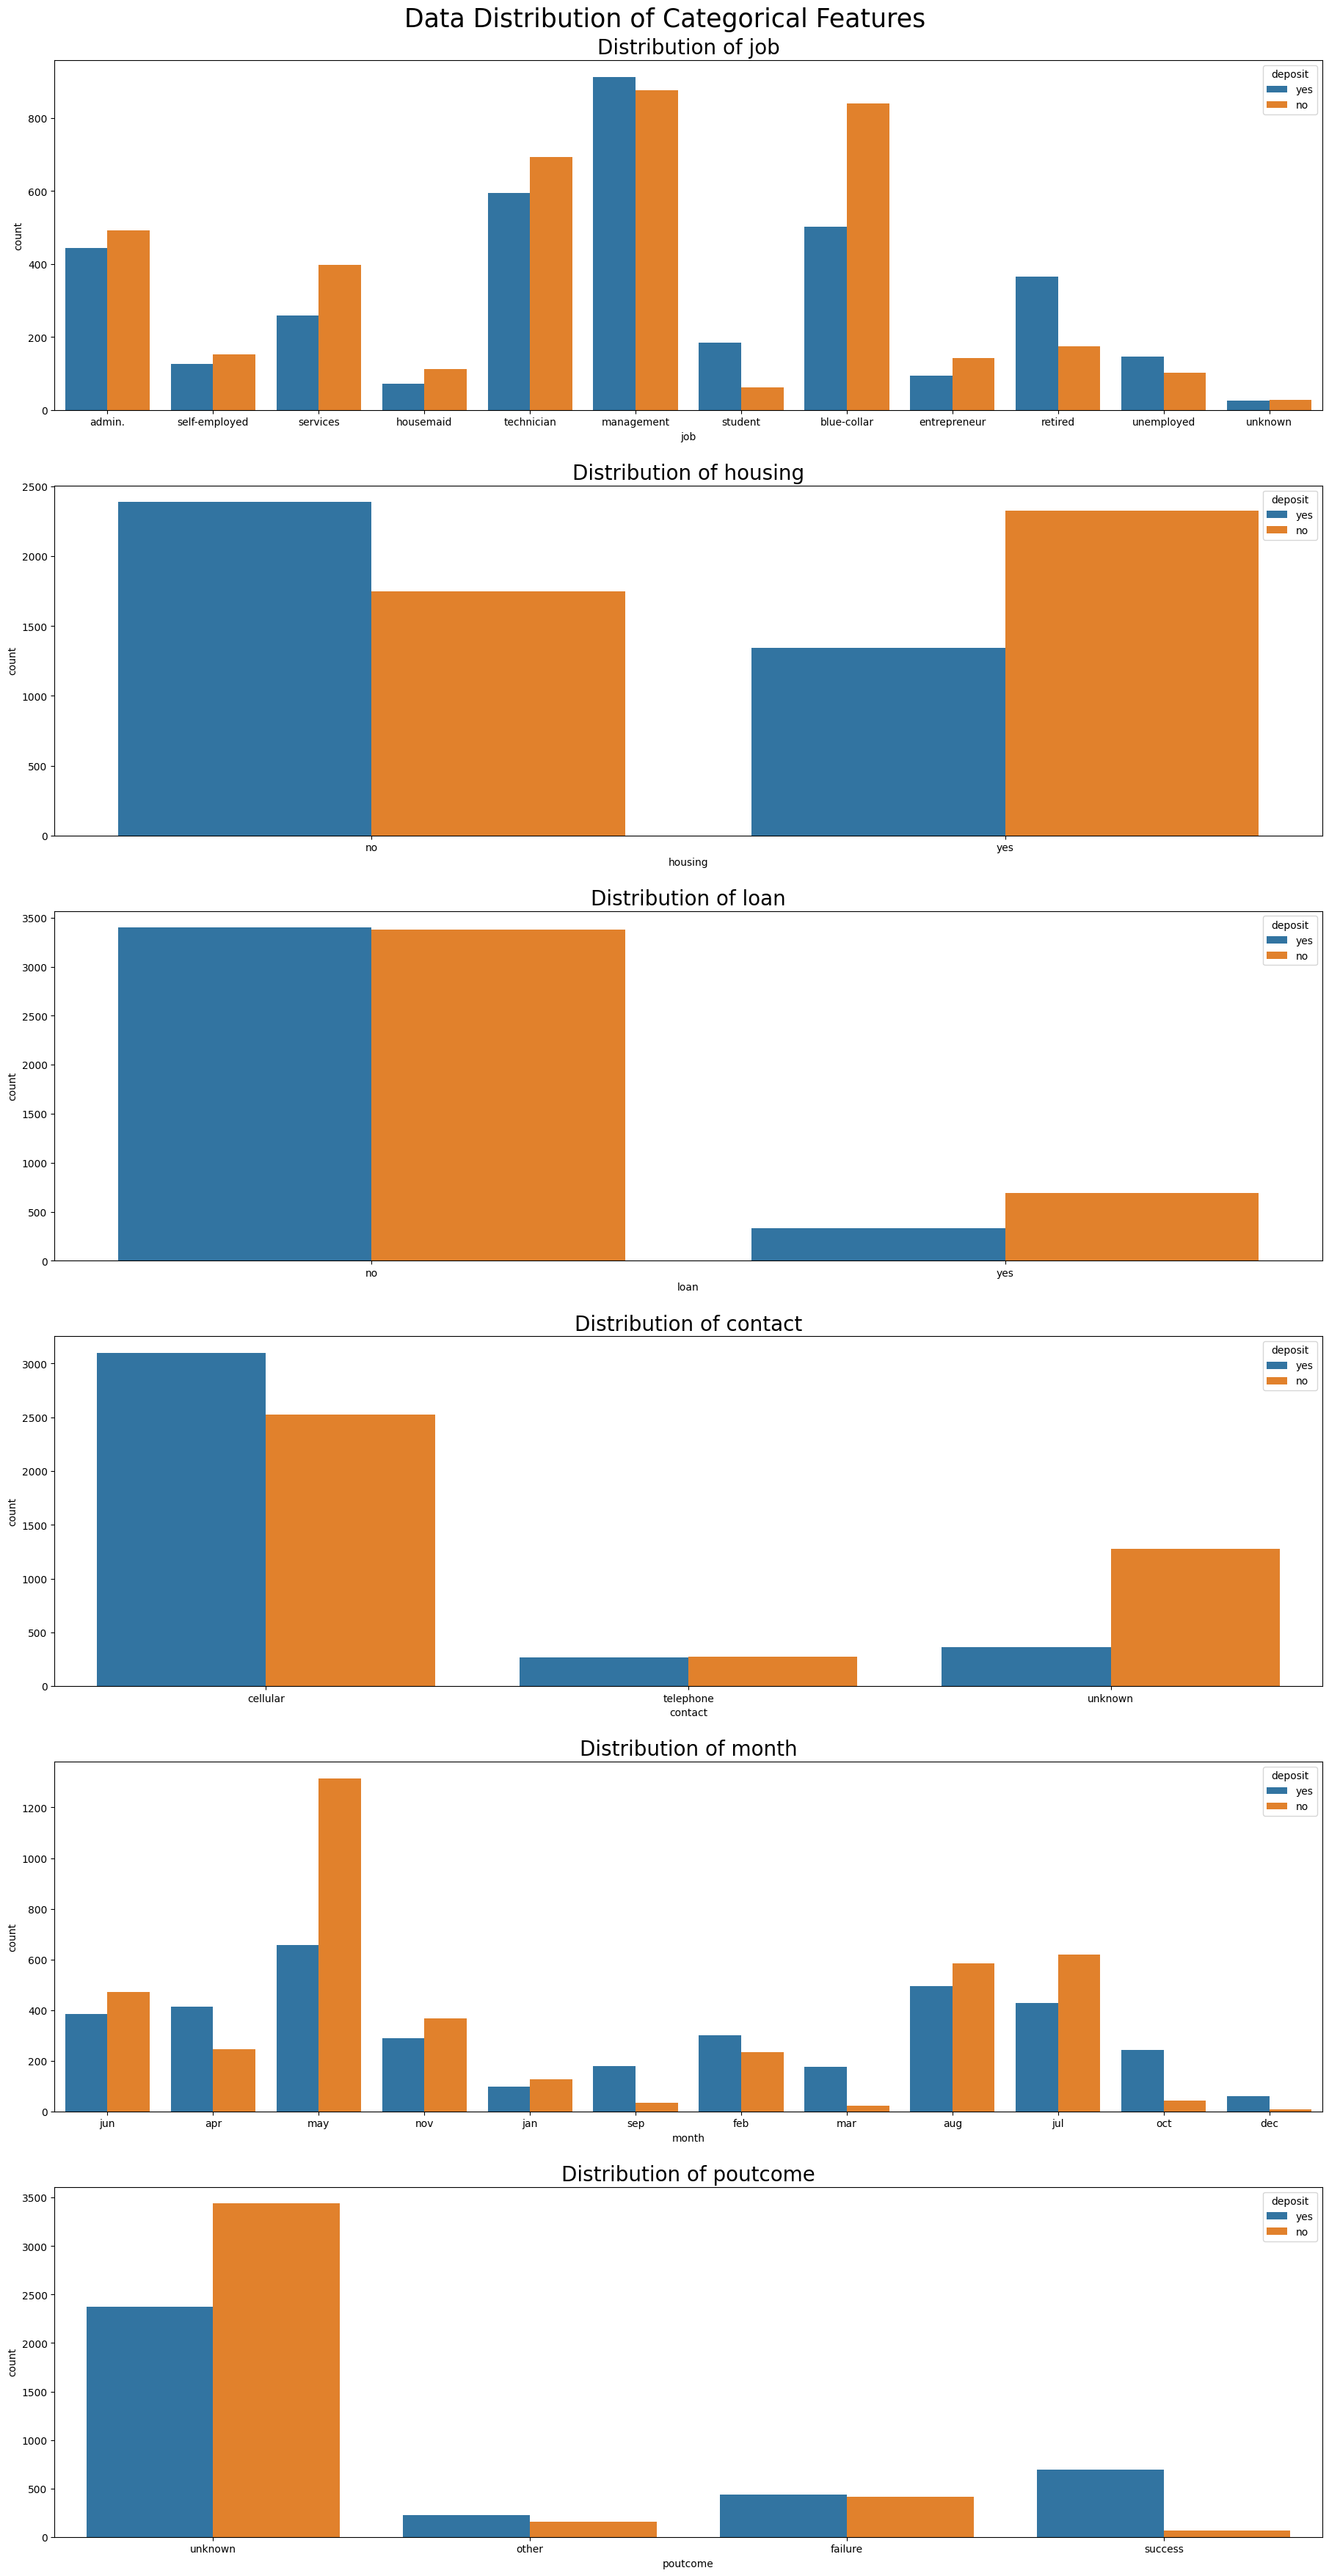

In [96]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(18,35),
                         gridspec_kw={"hspace": 0.05},constrained_layout = True)
plt.suptitle("Data Distribution of Categorical Features", size = 25)
counter1 = 0
for col in categorical_features:  
    axes[counter1].set_title(f"Distribution of {col}", color = "black")
    axes[counter1].title.set_size(20)
    sns.countplot(data = df, hue='deposit', x = col, ax=axes[counter1])
    if counter1 != 7:
        counter1 +=1
    errorbar=('ci', 0)
plt.show()

**Insights** :
- Distribution of jobs towards deposit status
    - nasabah dengan pekerjaan di bidang `management`, `student`, `retired` dan `unemployed` memiliki proporsi yang melakukan deposito lebih banyak. 
    - nasabah dengan pekerjaan `admin`, `self-employed`, `services`, `housemaid`, `technician`, `blue-collar`, `entrepreneur` memiliki proporsi yang tidak memiliki tabungan deposito lebih banyak. 


- Distribution of housing towards deposit status
    - proporsi nasabah yang memiliki cicilan KPR lebih banyak yang tidak memiliki deposito dibandingkan dengan nasabah yang tidak memiliki cicilan KPR.
     
- Distribution of loan towards deposit status
    - proporsi nasabah yang memiliki hutang dengan yang tidak memiliki hutang tidak jauh berbeda dalam hal memiliki tabungan dalam bentuk deposito. 

- Distribution of contact towards deposit status
    - proporsi nasabah yang dikontak melalui telepon selular lebih banyak yang membuka tabungan dibandingkan dengan telepon rumah. 

- Distribution of month towards deposit status
    - nasabah paling banyak dikontak pada bulan mei dan paling sedikit pada bulan december.
    - bulan yang memiliki nasabah melakukan deposit lebih banyak dibandingkan dengan yang tidak melakukan deposit adalah pada bulan `april`,`september`,`februari`,`maret` dan `oktober`

- Distribution of poutcome towards deposit status
    - status penawaran pembukaan rekening deposito berjangka pada campaign sebelumnya sukses lebih banyak yang membuka rekening deposito kembali pada periode campaign saat ini. 


## **Plot of Numerical Features vs Target**

In [97]:
numerical_features = ['age', 'balance','campaign','pdays']
target = ['deposit']

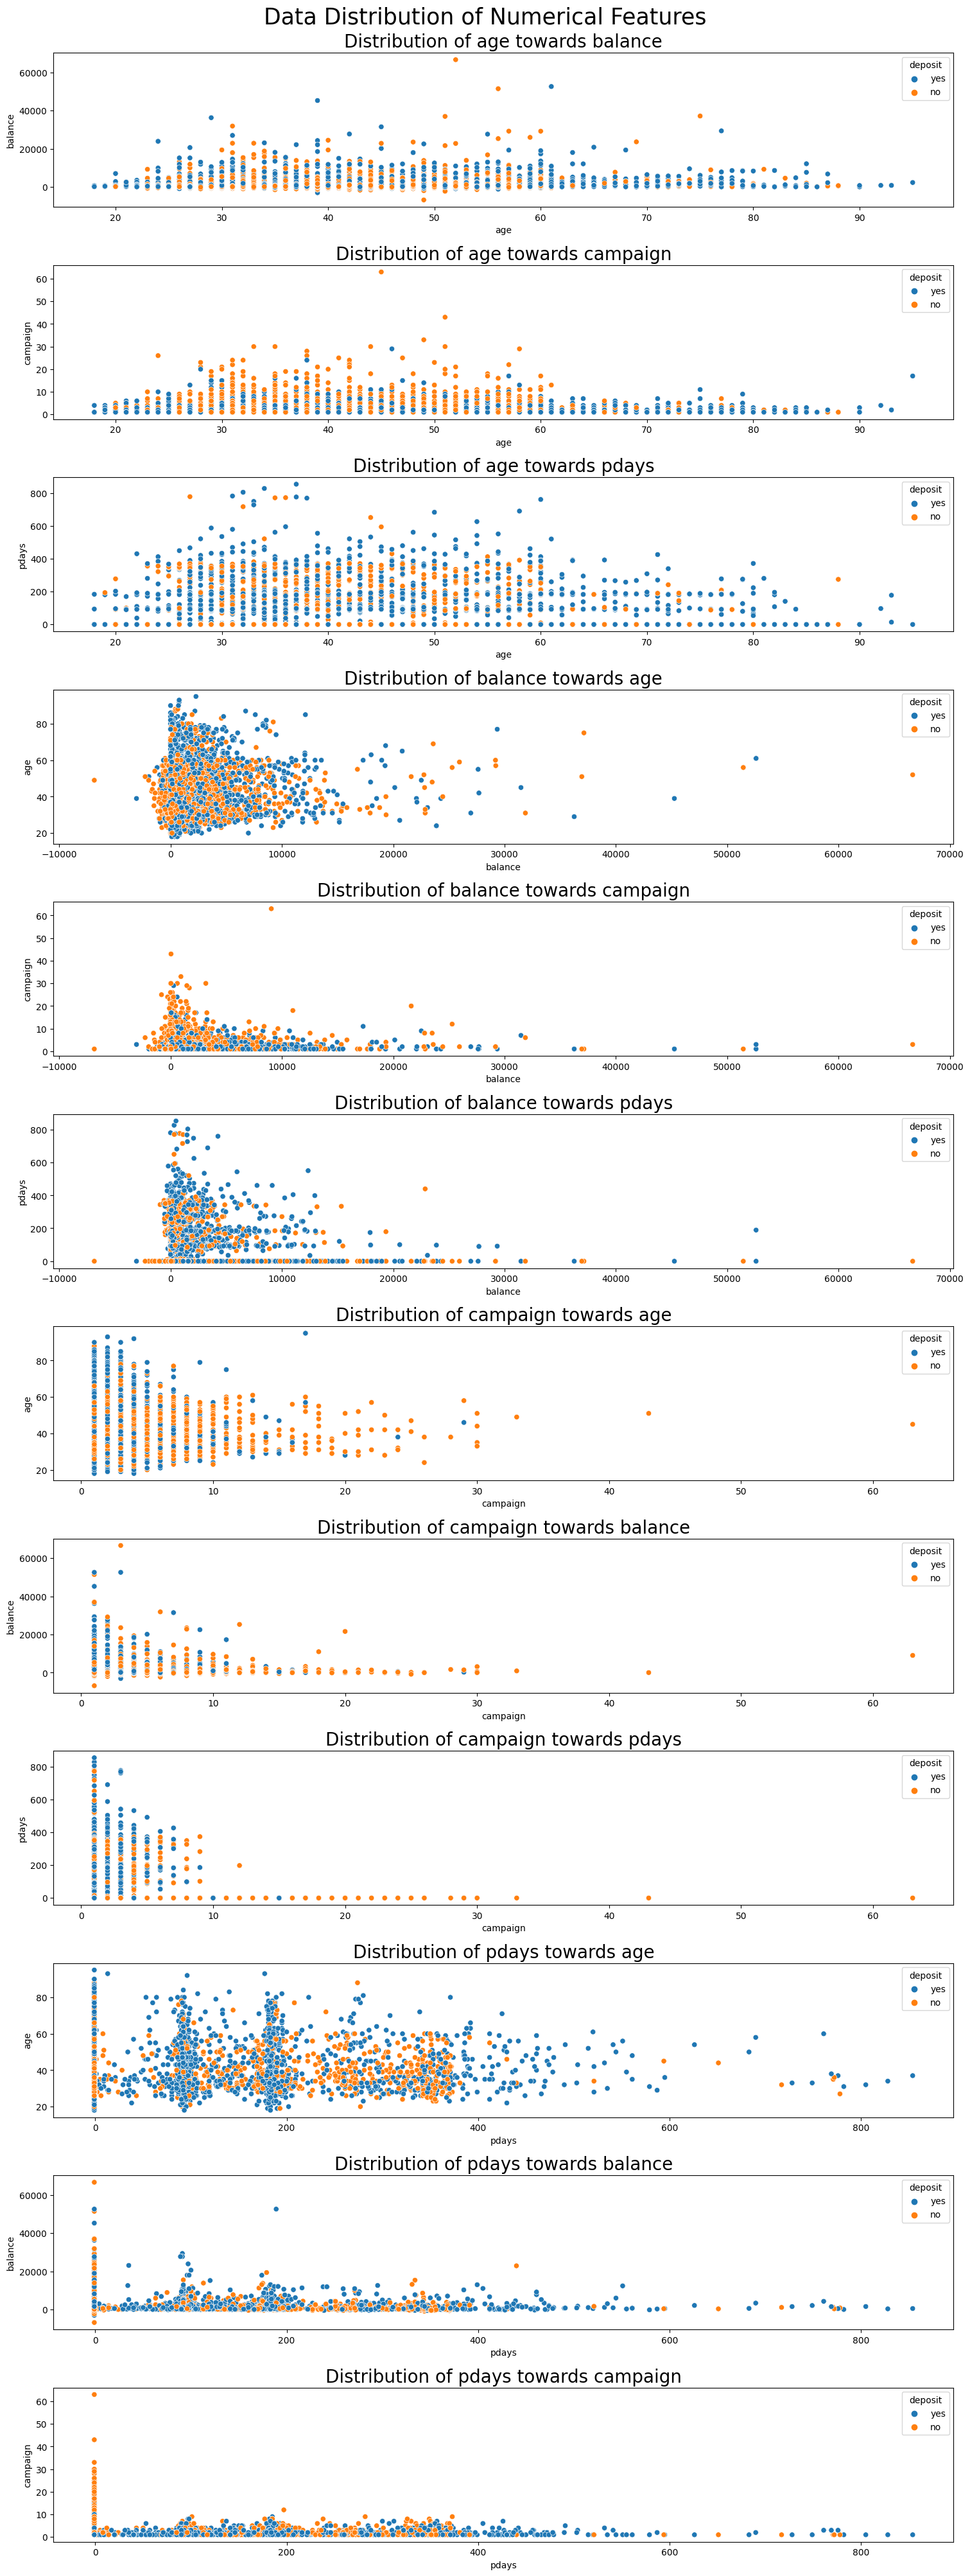

In [98]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize=(15,40),
                         gridspec_kw={"hspace": 0.05},constrained_layout = True)
plt.suptitle("Data Distribution of Numerical Features", size = 25)
counter1 = 0
for col in numerical_features:
    for col2 in numerical_features : 
        if col == col2 :
            pass 
        else:
            axes[counter1].set_title(f"Distribution of {col} towards {col2}", color = "black")
            axes[counter1].title.set_size(20)
            sns.scatterplot(data = df, x=col, y = col2, hue = 'deposit', ax=axes[counter1])
            if counter1 != 12:
                counter1 +=1
plt.show()

Insights :
- Pola dari masing-masing kolom kategorikal terhadap target tidak terklasifikasikan dengan jelas (tidak memiliki pola). 

<hr>

# **Data Preprocessing**

Berikut adalah tahapan tahapan yang preprocessing yang dilakukan.

## **Missing Values**

Karena pada dataset tidak memiliki missing value sehingga tidak ada proses mengisi missing value.

## **Drop Duplicates**

Terdapat 8 baris data yang duplikat dan sudah dilakukan drop_duplicates. 

## **Dropping Column**
**poutcome**
- Pada kolom poutcome, banyak data (sebanyak 74%) yang terkategorikan sebagai unknown sehingga pertimbangannya adalah untuk melakukan drop pada kolom poutcome.

In [99]:
df['poutcome'].value_counts()

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64

In [100]:
df = df.drop(columns='poutcome')

In [101]:
df.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'deposit'],
      dtype='object')

## **Handling Outliers**
Outliers pada dataset ini tidak ada yang diremove karena diperlukan untuk tidak mempersempit limitasi model yang akan dibuat. 

## **Binning**

binning strategy yang dilakukan adalah seperti ini :
- untuk kolom `age` dilakukan binning dengan strategy `uniform` dengan encoder `ordinal`. jumlah n_bins yang digunakan adalah `7`.
- untuk kolom `balance`, `campaign` dan `pdays` dilakukan binning dengan strategy `uniform` dengan encoder `onehot`. jumlah n_bins yang digunakan adalah `10`. 
 

In [102]:
numerical_features = ['age', 'balance','campaign','pdays']

In [103]:
listItem = []
for col in numerical_features :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().head(10).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(7805, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,age,int64,0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23]"
1,balance,int64,0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
2,campaign,int64,0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9]"
3,pdays,int64,0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412]"


## **Encoding**

Encoding categorical features

In [104]:
categorical_features = ['job', 'housing', 'loan', 'contact','month']

In [105]:
listItem = []
for col in categorical_features :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().head(10).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(7805, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,job,object,0,12,"[admin., self-employed, services, housemaid, t..."
1,housing,object,0,2,"[no, yes]"
2,loan,object,0,2,"[no, yes]"
3,contact,object,0,3,"[cellular, telephone, unknown]"
4,month,object,0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."


#### **Encoding Strategy   :**
- **BinaryEncoders**    : `job`, `month` 
    -  Pertimbangan untuk menggunakan binary encoding pada kolom job dan month adalah nilai unik pada kolom tersebut cukup banyak yaitu 12 nilai. 

#
- **OneHotEncoders**    : `housing`, `loan`, `contact`
    -  Pertimbangan untuk menggunakan OneHotEncoders pada kolom housing, loan dan contact adalah nilai pada kolom tersebut tidak banyak yaitu 2, 2 dan 3.

## **Scaling**

#### **Scaling Strategy**
- Robust Scaler : Digunakan karena pada `seluruh` kolom numerikal terdapat nilai `outlier`. 

In [106]:
# scaling features 
robust_scaler = RobustScaler()

####  **Changing Value**

Menguban nilai nasabah yang `melakukan deposito` menjadi `1` dan yang `tidak melakukan` deposito menjadi `0`.

In [107]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [108]:
df['deposit'] = np.where(df['deposit']=='yes',1,0)

In [109]:
df['deposit'].unique()

array([1, 0])

<hr>

# **Modeling**

### **Features & Target**

Melakukan pembagian kolom menjadi 2 bagian yaitu fitur dan target. X adalah features, y adalah target.

In [110]:
#features
X = df.drop(columns = 'deposit')

#target
y = df['deposit']


### **Splitting**

Melakukan pembagian data menjadi training set dan test set dengan proporsi `80% `untuk `training set` dan `20%` untuk `test set`. Karena supervised machine learning yang dilakukan adalah model klasifikasi sehingga perlu memasukan parameter `stratify = y` 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

## **Data Transformation**

### **Encoding Strategy   :**
- **BinaryEncoders**    : `job`, `month` 
    -  Pertimbangan untuk menggunakan binary encoding pada kolom `job` dan `month` adalah nilai unik pada kolom tersebut cukup banyak yaitu 12 nilai. 

#
- **OneHotEncoders**    : `housing`, `loan`, `contact`
    -  Pertimbangan untuk menggunakan OneHotEncoders pada kolom `housing`, `loan` dan `contact` adalah nilai pada kolom tersebut tidak banyak yaitu 2, 2 dan 3.

In [112]:
# Pipeline 
mode_binary = Pipeline([
    ('binary', BinaryEncoder())
])
mode_onehot = Pipeline([
    ('onehot', OneHotEncoder())
])
age_mode_discretizer = Pipeline([
    ('discretizer', KBinsDiscretizer(n_bins=7, strategy='uniform', encode='ordinal',subsample=None))
])

mode_discretizer = Pipeline([
    ('discretizer', KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot',subsample=None))
])


In [113]:
# Encoding
transformer = ColumnTransformer([
    ('mode_binary', mode_binary, ['job','month']),
    ('mode_onehot', mode_onehot, ['housing','loan','contact']),
    ('age_mode_discretizer', age_mode_discretizer, ['age']),
    ('mode_discretizer', mode_discretizer, ['balance','campaign','pdays'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('mode_binary',
                                 Pipeline(steps=[('binary', BinaryEncoder())]),
                                 ['job', 'month']),
                                ('mode_onehot',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['housing', 'loan', 'contact']),
                                ('age_mode_discretizer',
                                 Pipeline(steps=[('discretizer',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=7,
                                                                   strategy='uniform',
                                                                   subsample=None))]),
                                 ['age']),
                                ('mode_discretizer',
                                 Pipeline(steps=[('discretizer',
                                                  KBinsDiscretizer(n_bins=10,
                                                                   strategy='uniform',
                                                                   subsample=None))]),
                                 ['balance', 'campaign', 'pdays'])])

<hr>

## **Model Benchmark** 

In [114]:
# classic
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

# bagging classifier
bag_logreg = BaggingClassifier(estimator=logreg, n_estimators=50, max_samples=0.7)
bag_knn = BaggingClassifier(estimator=knn, n_estimators=50, max_samples=0.7)
bag_tree = BaggingClassifier(estimator=tree, n_estimators=50, max_samples=0.7)

# boosting
adaboost = AdaBoostClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0, verbosity=0)
rf = RandomForestClassifier(random_state=0)

#mencoba dengan menggunakan 10 algoritma machine learning

In [115]:
# Pilihan model
models = [logreg, knn, tree,rf,bag_logreg,bag_knn,bag_tree,adaboost,gradboost,xgboost]
list_mean = []
list_std = []
list_all_score = []
# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :
    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', robust_scaler),
        ('model', algoritma)
    ])
    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        error_score='raise'
    )
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_all_score.append(model_cv.round(4))

In [116]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':models,
    'mean': list_mean,
    'std': list_std,
    'all_score' : list_all_score
}).sort_values(['mean','std'], ascending=False)

,model,mean,std,all_score
8,GradientBoostingClassifier(random_state=0),0.667316,0.015542,"[0.663, 0.6864, 0.6414, 0.6797, 0.6661]"
7,AdaBoostClassifier(random_state=0),0.658633,0.016042,"[0.6724, 0.6762, 0.637, 0.6655, 0.6421]"
9,"XGBClassifier(base_score=None, booster=None, c...",0.657562,0.010658,"[0.6637, 0.6716, 0.6444, 0.6623, 0.6458]"
0,LogisticRegression(solver='liblinear'),0.656010,0.012146,"[0.6591, 0.6761, 0.6444, 0.6581, 0.6424]"
4,BaggingClassifier(estimator=LogisticRegression...,0.655714,0.014672,"[0.6614, 0.6795, 0.6401, 0.6569, 0.6406]"
3,RandomForestClassifier(random_state=0),0.645329,0.008607,"[0.6585, 0.647, 0.6349, 0.6493, 0.6369]"
5,BaggingClassifier(estimator=KNeighborsClassifi...,0.641687,0.018580,"[0.6382, 0.675, 0.6176, 0.6371, 0.6405]"
1,KNeighborsClassifier(),0.625743,0.012738,"[0.6306, 0.6468, 0.6082, 0.6224, 0.6208]"
6,BaggingClassifier(estimator=DecisionTreeClassi...,0.616201,0.014095,"[0.638, 0.6269, 0.5996, 0.6081, 0.6084]"
2,"DecisionTreeClassifier(max_depth=5, random_sta...",0.597276,0.020022,"[0.6317, 0.5876, 0.6076, 0.5814, 0.5781]"


#### **Interpretation**
- berdasarkan `cross validation` dari `10 model` yang dicoba, ternyata model yang menghasilkan akurasi paling tinggi adalah `GradientBoostingClassifier` dengan nilai skor `0.667316` dengan `standar deviasi` sebesar `0.015542` sehingga `GradientBoostingClassifier` akan dipilih untuk dilakukan `hyperparameter tuning`.

    


<hr>

## **Random Search Hyperparameter Tuning**

#### **GradientBoostingClassifier Simple Explanation**

GradientBoostingClassifier merupakan sekelompok algoritma machine learning yang mengkombinasikan learning model yang lemah untuk membuat suatu model predictive yang kuat. Decision trees digunakan ketika melakukan gradient boosting. Gradient boosting model menjadi populer karena efektivitasnya dalam mengklasifikasikan dataset yang kompleks.Gradient boosting memiliki 2 bagian yang penting juga yaitu weak learner dan additive component. Gradient boosting system menggunakan decision trees sebagai weak learnersnya dan komponen additivenya berasal dari tree yang ditambahkan ke model secara berulang kali dan nilai trees tersebut bernilai tetap. [1]

Gradient boosting classifier mengandalkan loss function. loss function adalah sebuah fungsi yang digunakan untuk menghitung perbedaan antara keluaran yang dibuat oleh algoritma saat ini dengan keluaran yang diharapkan. Metode ini akan mengevaluasi seberapa baik algoritma dalam memodelkan data dan menghasilkan keluaran yang tepat. Evaluasi akan diproses menggunakan formula matematika tertentu [2]




References :
- [1].https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/
- [2]. https://www.trivusi.web.id/2022/08/loss-function.html#:~:text=Loss%20function%20adalah%20sebuah%20fungsi,dan%20menghasilkan%20keluaran%20yang%20tepat.

Gradient boosting classifier menggunakan `log-likelihood` sebagai `loss function`nya. berikut adalah formula yang digunakannya.

![LOG Formula](https://editor.analyticsvidhya.com/uploads/885012.png)

dan hasil turunan akhir dari formula diatas adalah 

![LOG Formula](https://editor.analyticsvidhya.com/uploads/605878.png)

sumber : https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/#undefined

### **Gradient Boosting Hyperparameter Tuning**

Hyperparameter tuning dilakukan dengan menggunakan random search dengan n_iter 1000. terdapat 7 fitur hyperparameter yang dilakukan tuning yakni :
- n_estimators (The number of sequential trees to be modeled).
- max_depth (maximum number of the tree depth to be modeled).
- min_samples_split (Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting).
- min_samples_leaf (Defines the minimum samples (or observations) required in a terminal node or leaf).
- max_features (The number of features to consider while searching for a best split. These will be randomly selected).
- learning_rate (The learning parameter controls the magnitude of this change in the estimates).
- subsample (the fraction of observations to be selected for each tree. Selection is done by random sampling).


#### **Hyperparameter Tuning no 1**

In [117]:
gradboost = GradientBoostingClassifier(random_state=0)

pipe_gradboost = Pipeline([
        ('preprocess', transformer),
        ('scaler', robust_scaler),
        ('model', gradboost)
    ])
hyperparam_space= {
    'model__n_estimators': range(100,1000,50),
    'model__max_depth'   : range(2,10,1),
    'model__min_samples_split' : range(2,50, 1),
    'model__min_samples_leaf'  : range(2,50,1),
    'model__max_features'      : range(2,10,1),
    'model__learning_rate'     : np.arange(0.1,1,0.01),
    'model__subsample'         : np.arange(0.2,1,0.1)
}

random_search = RandomizedSearchCV(
    estimator = pipe_gradboost,           # model to tune
    param_distributions = hyperparam_space,       # hyperparam space
    cv = 5,
    scoring = 'f1', # metric
    n_jobs= -1,
    n_iter = 1000,
    random_state = 0       
)

# fit RandomizedSearchCV ke train set
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('mode_binary',
                                                                               Pipeline(steps=[('binary',
                                                                                                BinaryEncoder())]),
                                                                               ['job',
                                                                                'month']),
                                                                              ('mode_onehot',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder())]),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('age_mode_discretizer',
                                                                               Pipeline(steps=[('discretizer',
                                                                                                KBinsDis...
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
                                        'model__max_depth': range(2, 10),
                                        'model__max_features': range(2, 10),
                                        'model__min_samples_leaf': range(2, 50),
                                        'model__min_samples_split': range(2, 50),
                                        'model__n_estimators': range(100, 1000, 50),
                                        'model__subsample': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=0, scoring='f1')

In [118]:
# score terbaik hasil dari random_search
print(random_search.best_score_)

# hyperparameter pada score terbaik hasil dari random_search
print(random_search.best_params_)

0.6727343885152497
{'model__subsample': 0.6000000000000001, 'model__n_estimators': 150, 'model__min_samples_split': 41, 'model__min_samples_leaf': 12, 'model__max_features': 4, 'model__max_depth': 3, 'model__learning_rate': 0.15999999999999998}


In [119]:
# hasil dari 1000 kombinasi hyperparameter
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.049958,0.066641,0.039033,0.002884,0.6,450,33,45,9,8,0.19,"{'model__subsample': 0.6000000000000001, 'mode...",0.662630,0.676626,0.639286,0.667873,0.637422,0.656767,0.015697,265
1,1.753704,0.075785,0.033929,0.002247,0.9,550,32,45,3,8,0.28,"{'model__subsample': 0.9000000000000001, 'mode...",0.654155,0.676759,0.635379,0.668493,0.651786,0.657314,0.014316,242
2,2.259638,0.050235,0.040635,0.001320,0.7,800,2,36,3,6,0.53,"{'model__subsample': 0.7000000000000002, 'mode...",0.647788,0.648746,0.635464,0.662994,0.633452,0.645688,0.010654,515
3,1.472763,0.053820,0.031227,0.001693,0.2,800,15,33,2,7,0.79,"{'model__subsample': 0.2, 'model__n_estimators...",0.617021,0.640845,0.601925,0.627724,0.599644,0.617432,0.015564,880
4,3.211854,0.116084,0.054247,0.002017,0.5,900,46,16,4,8,0.3,"{'model__subsample': 0.5000000000000001, 'mode...",0.634752,0.643739,0.633716,0.655797,0.634836,0.640568,0.008433,617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.995426,0.153944,0.044038,0.003274,0.9,950,49,46,8,5,0.33,"{'model__subsample': 0.9000000000000001, 'mode...",0.655594,0.663701,0.639286,0.668483,0.629531,0.651319,0.014736,391
996,1.448542,0.128900,0.034630,0.002730,0.2,650,32,24,4,4,0.17,"{'model__subsample': 0.2, 'model__n_estimators...",0.672014,0.698497,0.644702,0.677064,0.641818,0.666819,0.021212,20
997,2.471219,0.136677,0.038433,0.000861,0.8,850,46,38,3,6,0.31,"{'model__subsample': 0.8000000000000003, 'mode...",0.676626,0.669643,0.637838,0.683499,0.642729,0.662067,0.018383,92
998,0.676880,0.067926,0.022920,0.000664,0.2,250,28,25,8,4,0.45,"{'model__subsample': 0.2, 'model__n_estimators...",0.654577,0.656716,0.626736,0.638370,0.623853,0.640051,0.013647,623


In [120]:
# model dengan score tertinggi
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
439,0.442179,0.027862,0.020618,0.002579,0.6,150,41,12,4,3,0.16,"{'model__subsample': 0.6000000000000001, 'mode...",0.668468,0.699552,0.658990,0.685202,0.651460,0.672734,0.017517,1
212,0.874550,0.023153,0.024521,0.001266,0.8,300,47,8,3,4,0.1,"{'model__subsample': 0.8000000000000003, 'mode...",0.674503,0.698556,0.647838,0.682396,0.657014,0.672061,0.018044,2
38,1.530112,0.020049,0.027524,0.001518,0.7,650,14,6,3,3,0.14,"{'model__subsample': 0.7000000000000002, 'mode...",0.669078,0.696123,0.660142,0.682525,0.646465,0.670867,0.017248,3
179,0.470403,0.014012,0.018716,0.000511,0.8,150,47,23,7,3,0.51,"{'model__subsample': 0.8000000000000003, 'mode...",0.667268,0.694794,0.657730,0.683150,0.650823,0.670753,0.016190,4
422,0.630841,0.043096,0.021118,0.000970,0.4,250,2,49,2,6,0.13,"{'model__subsample': 0.4000000000000001, 'mode...",0.672598,0.689716,0.655083,0.673267,0.662466,0.670626,0.011692,5
713,0.539563,0.034596,0.020818,0.000749,0.6,150,23,14,3,7,0.12,"{'model__subsample': 0.6000000000000001, 'mode...",0.660534,0.703139,0.662577,0.676498,0.647113,0.669972,0.019021,6
699,0.420160,0.011790,0.019316,0.001123,0.9,150,30,18,7,2,0.32,"{'model__subsample': 0.9000000000000001, 'mode...",0.673250,0.688909,0.657244,0.681614,0.646520,0.669507,0.015594,7
717,1.498785,0.080798,0.026123,0.002269,0.7,700,40,13,3,2,0.19,"{'model__subsample': 0.7000000000000002, 'mode...",0.667257,0.688230,0.648889,0.680543,0.662478,0.669479,0.013798,8
347,1.067115,0.056449,0.025122,0.001320,0.9,400,41,10,2,4,0.27,"{'model__subsample': 0.9000000000000001, 'mode...",0.662478,0.691892,0.660698,0.678832,0.649446,0.668669,0.014926,9
861,0.703003,0.026618,0.021018,0.000708,0.6,250,26,5,4,3,0.15,"{'model__subsample': 0.6000000000000001, 'mode...",0.661247,0.698470,0.653025,0.667883,0.662478,0.668620,0.015664,10


Interprestasi Top 10 Best Score:
- n_estimators dalam range 150-700
- min_samples_split dalam range 2-47
- min_samples_leaf dalam range 5-49
- max_features 2-7
- max_depth 2-7
- learning_rate 0.1-0.51
- subsample 0.4-0.9

Rentang nilai per kategori diatas dijadikan sebagai rentang nilai yang akan digunakan di parameter hypertuning kedua

- #### **[Tuning no 2]**

In [122]:
gradboost = GradientBoostingClassifier(random_state=0)

pipe_gradboost = Pipeline([
        ('preprocess', transformer),
        ('scaler', robust_scaler),
        ('model', gradboost)
    ])

hyperparam_space= {
    'model__n_estimators': range(150,701,50), #751 karena stopnya exclusive
    'model__max_depth'   : range(2,8,1),
    'model__min_samples_split' : range(4,48,1),
    'model__min_samples_leaf'  : range(8,50,1),
    'model__max_features'      : range(2,8,1),
    'model__learning_rate'     : np.arange(0.1,0.52,0.01),
    'model__subsample'         : np.arange(0.4,1,0.1)
}

random_search2 = RandomizedSearchCV(
    estimator = pipe_gradboost,           # model to tune
    param_distributions = hyperparam_space,       # hyperparam space
    cv = 5,
    scoring = 'f1', # metric
    n_jobs= -1,
    n_iter = 1000,
    random_state = 0       
)

# fit RandomizedSearchCV ke train set
random_search2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('mode_binary',
                                                                               Pipeline(steps=[('binary',
                                                                                                BinaryEncoder())]),
                                                                               ['job',
                                                                                'month']),
                                                                              ('mode_onehot',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder())]),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('age_mode_discretizer',
                                                                               Pipeline(steps=[('discretizer',
                                                                                                KBinsDis...
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51]),
                                        'model__max_depth': range(2, 8),
                                        'model__max_features': range(2, 8),
                                        'model__min_samples_leaf': range(8, 50),
                                        'model__min_samples_split': range(4, 48),
                                        'model__n_estimators': range(150, 701, 50),
                                        'model__subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=0, scoring='f1')

In [ ]:
# score terbaik hasil dari random_search
print(random_search2.best_score_)

# hyperparameter pada score terbaik hasil dari random_search
print(random_search2.best_params_)

0.674482264628126
{'model__subsample': 0.5000000000000001, 'model__n_estimators': 250, 'model__min_samples_split': 38, 'model__min_samples_leaf': 8, 'model__max_features': 3, 'model__max_depth': 3, 'model__learning_rate': 0.34999999999999987}


hasil terbaik setelah dilakukan hyperparameter tuning yang kedua adalah `0.6744` untuk akurasinya. dan parameter yang digunakan adalah :
- n_estimators : 250
- min_samples_split : 38
- min_samples_leaf : 8
- max_features : 3
- max_depth : 3
- learning_rate : 0.34999999999999987

sehingga hasil dari hyperparameter tuning yang kedua tersebut akan dijadikan sebagai `best model`.

In [ ]:
random_search2.best_estimator_


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mode_binary',
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  ['job', 'month']),
                                                 ('mode_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('age_mode_discretizer',
                                                  Pipeline(steps=[('discretizer',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=7...
                                                 ('mode_discretizer',
                                                  Pipeline(steps=[('discretizer',
                                                                   KBinsDiscretizer(n_bins=10,
                                                                                    strategy='uniform',
                                                                                    subsample=None))]),
                                                  ['balance', 'campaign',
                                                   'pdays'])])),
                ('scaler', RobustScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.34999999999999987,
                                            max_features=3, min_samples_leaf=8,
                                            min_samples_split=38,
                                            n_estimators=250, random_state=0,
                                            subsample=0.5000000000000001))])

<hr>

## **Predict to Test Set**

#### **Before Tuning vs After Tuning**

In [ ]:
#before tuning
gradboost = GradientBoostingClassifier(random_state=0)

pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', robust_scaler),
        ('model', gradboost)])
# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred = pipe_model.predict(X_test)

# evaluate (f1-score)
f1_score(y_test, y_pred)

0.6463068181818182

In [ ]:
#after tuning
# menggunakan model terbaik hasil randomizedsearch
best_model = random_search2.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# predict
y_pred = best_model.predict(X_test)

# evaluate (f1-score)
f1_score(y_test, y_pred)

0.6479481641468682

#### **Performance Summary**

GradientBoostingClassifier Performance pada train set :
- Initial Benchmark : `0.672697`
- Hyperparameter tuning 2 : `0.6715`

GradientBoostingClassifier Performance pada test set :
- Initial Benchmark : `0.657`
- Hyperparameter tuning 2 : `0.655`

Performance pada hyperparameter tuning 2 baik pada train set maupun test set cenderung menurun namun tidak berbeda signifikan. sehingga `model yang digunakan` tetap model yang setelah dilakukan `hyperparameter tuning 2`. 



<hr>

## **Model Properties**

### **Feature Importances**

In [ ]:
binary_features = list(best_model['preprocess'].transformers_[0][1][0].get_feature_names_out())
binary_features

['job_0',
 'job_1',
 'job_2',
 'job_3',
 'month_0',
 'month_1',
 'month_2',
 'month_3']

In [ ]:
onehot_features = list(best_model['preprocess'].transformers_[1][1].get_feature_names_out())
onehot_features

['housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown']

In [ ]:
discretizer1_features = list(best_model['preprocess'].transformers_[2][1].get_feature_names_out())
discretizer1_features

['age']

In [ ]:
discretizer2_features = list(best_model['preprocess'].transformers_[3][1].get_feature_names_out())
discretizer2_features

['balance_0.0',
 'balance_1.0',
 'balance_2.0',
 'balance_3.0',
 'balance_4.0',
 'balance_5.0',
 'balance_6.0',
 'balance_7.0',
 'balance_8.0',
 'balance_9.0',
 'campaign_0.0',
 'campaign_1.0',
 'campaign_2.0',
 'campaign_3.0',
 'campaign_4.0',
 'campaign_5.0',
 'campaign_6.0',
 'campaign_7.0',
 'campaign_8.0',
 'campaign_9.0',
 'pdays_0.0',
 'pdays_1.0',
 'pdays_2.0',
 'pdays_3.0',
 'pdays_4.0',
 'pdays_5.0',
 'pdays_6.0',
 'pdays_7.0',
 'pdays_8.0',
 'pdays_9.0']

In [ ]:
feature_names = binary_features + onehot_features + discretizer1_features + discretizer2_features
feature_names

['job_0',
 'job_1',
 'job_2',
 'job_3',
 'month_0',
 'month_1',
 'month_2',
 'month_3',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'age',
 'balance_0.0',
 'balance_1.0',
 'balance_2.0',
 'balance_3.0',
 'balance_4.0',
 'balance_5.0',
 'balance_6.0',
 'balance_7.0',
 'balance_8.0',
 'balance_9.0',
 'campaign_0.0',
 'campaign_1.0',
 'campaign_2.0',
 'campaign_3.0',
 'campaign_4.0',
 'campaign_5.0',
 'campaign_6.0',
 'campaign_7.0',
 'campaign_8.0',
 'campaign_9.0',
 'pdays_0.0',
 'pdays_1.0',
 'pdays_2.0',
 'pdays_3.0',
 'pdays_4.0',
 'pdays_5.0',
 'pdays_6.0',
 'pdays_7.0',
 'pdays_8.0',
 'pdays_9.0']

In [ ]:
feature_imp = pd.DataFrame({"feature" : feature_names, "importance" : best_model['model'].feature_importances_}).sort_values(by='importance', ascending=False)
feature_imp

,feature,importance
14,contact_unknown,0.136233
15,age,0.089002
9,housing_yes,0.081388
37,pdays_1.0,0.073813
6,month_2,0.064920
38,pdays_2.0,0.052026
8,housing_no,0.034821
5,month_1,0.033755
3,job_3,0.031310
36,pdays_0.0,0.031117


<hr>

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

#### **PR-Curve**

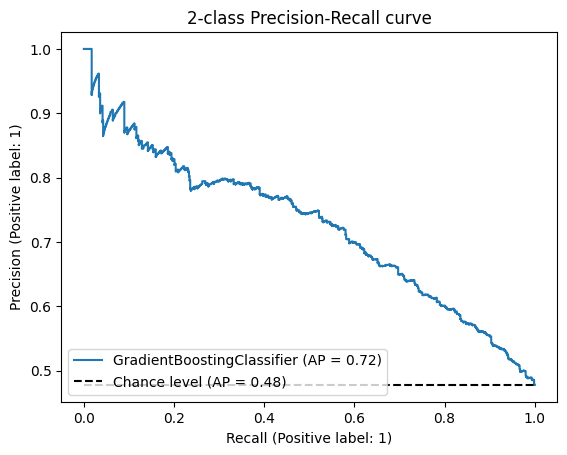

In [ ]:
display = PrecisionRecallDisplay.from_estimator(
    best_model, X_test, y_test, name="GradientBoostingClassifier", plot_chance_level=True)
_ = display.ax_.set_title("2-class Precision-Recall curve")

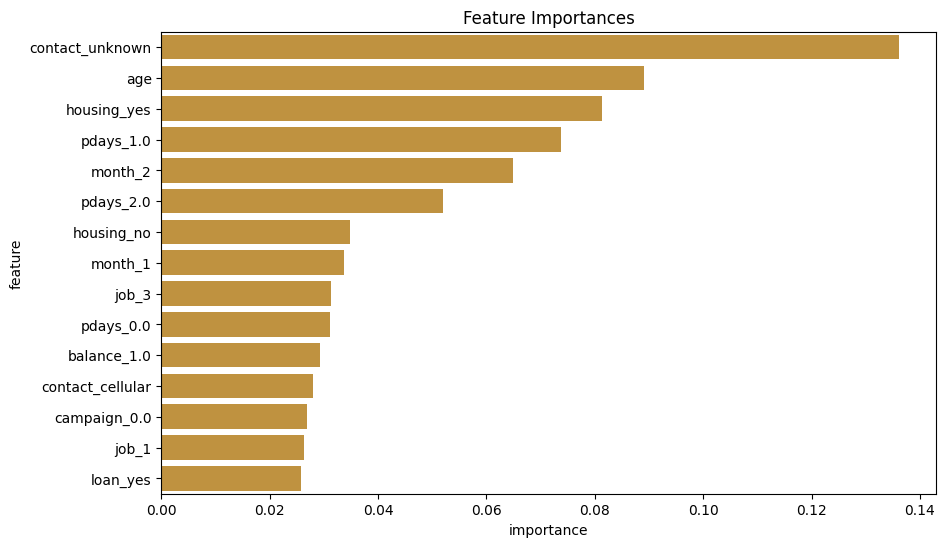

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp.head(15), x='importance', y='feature', color='orange', saturation=0.5)
plt.title('Feature Importances')
plt.show()

Interpretasi
- feature yang paling penting adalah kontak dengan nilai unknown. 
- feature kedua terpenting adalah age, ternyata usia menentukan apakah seseorang itu akan melakukan deposito atau tidak. 


### **Confusion Matrix** 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       815
           1       0.70      0.60      0.65       746

    accuracy                           0.69      1561
   macro avg       0.69      0.68      0.68      1561
weighted avg       0.69      0.69      0.68      1561



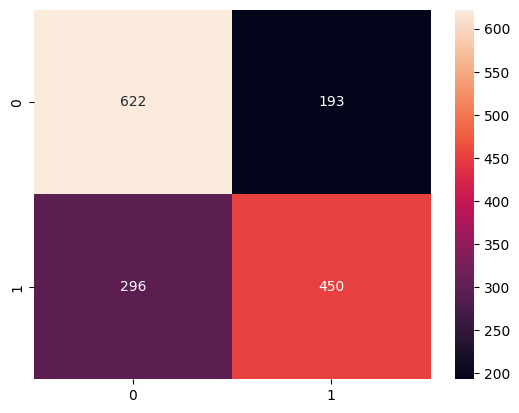

In [ ]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

Berdasarkan confusion matrix pada test set diatas dapat diketahui bahwa dengan model yang kita buat didapatkan informasi sebagai berikut ini :
- `True Positive (TP)` : Sebanyak `450` jumlah nasabah yang `aktualnya membuka rekening tabungan deposito berjangka` dan `diprediksi membuka rekening tabungan deposito berjangka`.
- `True Negative (TN)` : Sebanyak `622` jumlah nasabah yang aktualnya `tidak membuka rekening tabungan deposito berjangka` dan `diprediksi tidak akan membuka rekening tabungan deposito berjangka`.
- `False Positive (FP)` : Sebanyak `193` jumlah nasabah yang `aktualnya tidak membuka rekening tabungan deposito berjangka` dan `diprediksi membuka rekening tabungan deposito berjangka`.
- `False Negative (FN)`: Sebanyak `296` jumlah nasabah yang `aktualnya membuka rekening tabungan deposito berjangka` dan `diprediksi tidak akan membuka rekening tabungan deposito berjangka` 

<hr>

## **Model Limitation** 


In [123]:
X.describe(include='O')

,job,housing,loan,contact,month
count,7805,7805,7805,7805,7805
unique,12,2,2,3,12
top,management,no,no,cellular,may
freq,1789,4136,6781,5623,1973


Batasan model machine learning yang digunakan adalah sebagai berikut ini :
- rentang  `age`        : 18 s/d 95 tahun
- rentang `balance`     : -6847 s/d 66653
- rentang `campaign`    : 1 s/d 63
- rentang `pdays`       : -1 s/d 854

 sehingga apabila nilai yang diprediksi diluar dari rentang nilai diatas maka hasil prediksi dianggap sebagai tidak valid.

<hr>

## **Conclusion**

#### **References** :
- [1] https://www.prosalesconnection.com/blog/how-many-cold-calls-per-hour-should-i-make
- [2] https://www.glassdoor.com/Hourly-Pay/U-S-Bank-Telemarketing-Hourly-Pay-E8937_D_KO9,22.htm


#### **Number of calls made**

Berdasarkan referensi pada no 1, rata-rata seorang telemarketing secara optimal dapat mengontak `10` nasabah setiap jamnya, apaabila diasumsikan jam kerja per harinya adalah 8 jam, maka dalam satu hari seorang telemarketer dapat mengontak nasabah sebanyak `80` nasabah.

#### **telemarketer rate**

berdasarkan referensi pada nomor 2, seorang telemarketing bank dibayar sebesar `USD 34` perjamnya. sehingga dalam sehari, bank harus menghabiskan biaya sebesar `$272`.

#### **telemarketer fee / number of customer**
- **marketing campaign fee per customer = $272 / 80** 
- **marketing campaign fee per customer = $3.4**

#### **Keuntungan deposito perbankan**

Cara bank mendapatkan profit dari term deposit adalah nasabah yang memiliki tabungan deposito diberikan kompensasi sebesar `2%`, dari dana nasabah tersebut, bank meminjamkan ke pihak lain dengan interest rate `7%`, sehingga bank memperoleh keuntungan sebesar 5%. jika diasumsikan rata-rata nasabah memiliki tabungan deposito berjangka sebesar `$1000`, maka keuntungan bagi bank yang dapat diperoleh adalah sebesar :
Profit = 5% x $1000 = `$50 untuk setiap nasabahnya`. 


source : https://www.investopedia.com/terms/t/termdeposit.asp

### **Saat tidak menggunakan machine learning**

**Profit / Loss Estimation**

Apabila terdapat 1561 nasabah, maka apabila tidak menggunakan machine learning, bank akan melakukan marketing campaign ke seluruh nasabah. berarti perhitungannya adalah sebagai berikut ini :

- **total marketing campaign fee = $3.4 * 1561**
- **total marketing campaign fee = $`5307`**

dan ternyata nasabah yang membuka rekening tabungan deposito berjangka hanya  746 nasabah (450 + 296)

- **total term deposit revenue = $50 * 746**
- **total term deposit revenue = $37300**

- **total profit = total revenue - total fee**
- **total profit = $37300 - $5307** 
- **total profit = $31993**

`Pada saat tidak menggunakan machine learning, total keuntungan yang diperoleh adalah $31993`

### **Saat menggunakan machine learning**

**Profit / Loss Estimation**

Berdasarkan hasil prediksi machine learning maka bank akan melakukan marketing campaign kepada nasabah yang diprediksi akan membuka rekening tabungan deposito berjangka saja, berdasarkan confusion matrix total nasabah yang akan diberikan marketing campaign adalah sebanyak 652 nasabah (450+193) 

- **total marketing campaign fee = $3.4 x 652** 
- **total marketing campaign fee = $2216.8**


dan yang ternyata nasabah yang membuka rekening tabungan deposito berjangka hanya 450 nasabah. apabila 1 nasabah memberikan keuntungan sebesar $50 maka

- **total term deposit revenue = $50 x 450**
- **total term deposit revenue = $22500**

- **total profit = total revenue - total fee**
- **total profit = 22500 - 2216.8** 
- **total profit = $20283**

`Dengan menggunakan machine learning, diperkirakan bank akan memiliki keuntungan sebesar $20283 `

<table>
<h2><b> Conclusion Summary </b></h2>
  <tr>
    <th>ML Usage</th>
    <th>Total Revenue</th>
    <th>Total Cost</th>
    <th>Total Profit</th>
  </tr>
  <tr>
    <td>Tidak Menggunakan Machine Learning</td>
    <td>$37300</td>
    <td>$5307</td>
    <td>$31993</td>
  </tr>
    <tr>
    <td>Menggunakan Machine Learning</td>
    <td>$22500</td>
    <td>$2216.8</td>
    <td>$20283</td>

  </tr>
</table>

- Baik menggunakan machine learning atau tidak menggunakan machine learning masih memberikan keuntungan bagi perbankan.
- Apabila menggunakan machine learning maka jumlah nasabah yang diberikan marketing campaign lebih sedikit namun profit yang didapat juga lebih sedikit. 
- Apabila tidak menggunakan machine learning maka jumlah nasabah yang diberikan marketing campaign lebih banyak namun profit yang didapat juga lebih banyak. 

<hr>

## **Recommendation**

Hal-hal yang direkomendasikan adalah sebagai berikut ini :
- Bagian administratif yang mengumpulkan data untuk memperbaiki kualitas pengumpulan datanya sehingga data yang dikumpulkan dpaat menjadi dataset yang akurat, karena pada salah satu kolom (`contact`) terdapat nilai unknown yang cukup banyak sehingga dapat mempengaruhi baik hasil klasifikasi maupun hasil feature importancenya.  
- Menambahkan fitur baru supaya dapat meningkatkan akurasi klasifikasi, karena berdasarkan 10 model algoritma yang digunakan, nilai akurasi terbaik hanya 67% saja. diharapkan dengan menambah fitur baru, dapat meningkatkan nilai akurasi klasifikasinya hingga mencapai 80%. 
- Melakukan `root-cause analysis` mengapa machine learning dapat mengklasifikasikan nasabah secara tidak akurat sehingga pada akhirnya kita dapat memprediksi dengna fitur mana yang sebaiknya digunakan yang dapat mempengaruhi hasil prediksi machiine learning. 


<hr>

## **Save Model** 

In [ ]:
import pickle

In [ ]:
# saving model

# best model
final_model = random_search2.best_estimator_

# fitting to all data
final_model.fit(X, y)

# save
pickle.dump(final_model, open('model_gradboost_for_deposit_classification.sav', 'wb'))

<hr>

<marquee> <h1> <font color = 'yellow'>Thank You!</font></h1></marquee>